In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar
warnings.filterwarnings('ignore')

In [9]:
# 数据加载
df = pd.read_csv('002621utf8.csv')#这个文件是从美吉姆网站上下载下来的
df

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2020-10-16,'002621,美吉姆,7.07,7.19,6.97,7.00,7.04,0.03,0.4261,0.5747,4651108,3.302721e+07,5.844506e+09,5.721521e+09
1,2020-10-15,'002621,美吉姆,7.04,7.23,6.90,7.02,6.85,0.19,2.7737,0.7743,6265798,4.435304e+07,5.819707e+09,5.697243e+09
2,2020-10-14,'002621,美吉姆,6.85,7.16,6.84,6.93,6.95,-0.1,-1.4388,0.4038,3267859,2.279647e+07,5.662641e+09,5.543482e+09
3,2020-10-13,'002621,美吉姆,6.95,6.96,6.84,6.95,6.96,-0.01,-0.1437,0.2279,1844460,1.275408e+07,5.745307e+09,5.624409e+09
4,2020-10-12,'002621,美吉姆,6.96,6.99,6.72,6.99,6.86,0.1,1.4577,0.5032,4071930,2.812961e+07,5.753574e+09,5.632501e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2011-10-11,'002621,大连三垒,24.13,25.85,23.70,24.25,23.60,0.53,2.2458,34.9752,7005537,1.723708e+08,2.413000e+09,4.833239e+08
2193,2011-10-10,'002621,大连三垒,23.60,24.18,22.36,22.66,22.69,0.91,4.0106,22.7764,4562109,1.065325e+08,2.360000e+09,4.727080e+08
2194,2011-09-30,'002621,大连三垒,22.69,23.80,22.05,23.10,24.08,-1.39,-5.7724,26.7312,5354251,1.215095e+08,2.269000e+09,4.544807e+08
2195,2011-09-29,'002621,N三垒,24.08,25.15,22.88,23.98,24.00,0.08,0.3333,57.5282,11522900,2.806628e+08,2.408000e+09,4.823224e+08


In [10]:
df = df[['日期', '收盘价']]
df

,日期,收盘价
0,2020-10-16,7.07
1,2020-10-15,7.04
2,2020-10-14,6.85
3,2020-10-13,6.95
4,2020-10-12,6.96
...,...,...
2192,2011-10-11,24.13
2193,2011-10-10,23.60
2194,2011-09-30,22.69
2195,2011-09-29,24.08


In [12]:
# 将时间作为df的索引
df.日期 = pd.to_datetime(df.日期)
df.index = df.日期
print(df.head())

                   日期   收盘价
日期                         
2020-10-16 2020-10-16  7.07
2020-10-15 2020-10-15  7.04
2020-10-14 2020-10-14  6.85
2020-10-13 2020-10-13  6.95
2020-10-12 2020-10-12  6.96


In [13]:
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
print(df_month)
print(df_Q)
print(df_year)

                  收盘价
日期                   
2011-09-30  15.590000
2011-10-31  25.367500
2011-11-30  26.827727
2011-12-31  22.894545
2012-01-31  20.243333
...               ...
2020-06-30   7.218500
2020-07-31   7.094783
2020-08-31   7.286190
2020-09-30   6.739091
2020-10-31   6.955000

[110 rows x 1 columns]
                  收盘价
日期                   
2011-09-30  15.590000
2011-12-31  24.996167
2012-03-31  21.755690
2012-06-30  13.854407
2012-09-30  11.348462
2012-12-31  11.231803
2013-03-31  12.282143
2013-06-30  11.829298
2013-09-30  12.532500
2013-12-31  13.158361
2014-03-31  14.530517
2014-06-30  12.297541
2014-09-30  11.682000
2014-12-31  15.629180
2015-03-31  14.453509
2015-06-30  22.543387
2015-09-30  17.672031
2015-12-31  23.565574
2016-03-31  17.248983
2016-06-30  16.114098
2016-09-30  10.150000
2016-12-31  21.739667
2017-03-31  27.531864
2017-06-30   8.726333
2017-09-30   0.000000
2017-12-31  11.053333
2018-03-31   5.664576
2018-06-30  11.026167
2018-09-30  16.327813
2018-12-

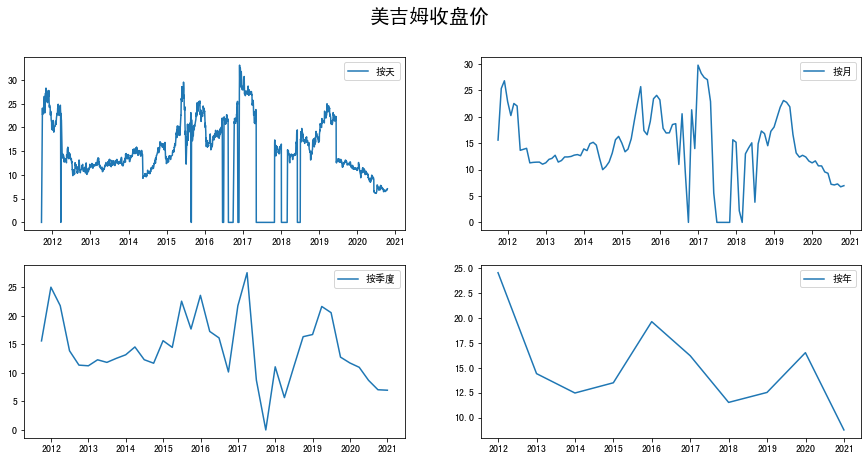

In [14]:
# 按照天，月，季度，年来显示沪市指数的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('美吉姆收盘价', fontsize=20)
plt.subplot(221)
plt.plot(df.收盘价, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.收盘价, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.收盘价, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.收盘价, '-', label='按年')
plt.legend()
plt.show()

In [15]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.收盘价,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())

最优模型:                                ARMA Model Results                              
Dep. Variable:                    收盘价   No. Observations:                  110
Model:                     ARMA(1, 0)   Log Likelihood                -325.754
Method:                       css-mle   S.D. of innovations              4.662
Date:                Tue, 20 Oct 2020   AIC                            657.507
Time:                        12:26:49   BIC                            665.609
Sample:                    09-30-2011   HQIC                           660.793
                         - 10-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2596      1.449      9.841      0.000      11.420      17.100
ar.L1.收盘价      0.6994      0.067     10.366      0.000       0.567       0.832
                                    Roots    

In [16]:
# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['收盘价']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
#print(last_month)
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=next_month_days)
    date_list.append(last_month)
print('date_list=', date_list)

date_list= [Timestamp('2020-11-30 00:00:00', freq='M'), Timestamp('2020-12-31 00:00:00', freq='M'), Timestamp('2021-01-31 00:00:00', freq='M')]


                  收盘价   forecast
2011-09-30  15.590000        NaN
2011-10-31  25.367500  15.190128
2011-11-30  26.827727  22.028819
2011-12-31  22.894545  23.050147
2012-01-31  20.243333  20.299157
...               ...        ...
2020-12-31        NaN  10.686166
2021-01-31        NaN  11.760233
2020-11-30        NaN   9.150538
2020-12-31        NaN  10.686166
2021-01-31        NaN  11.760233

[116 rows x 2 columns]


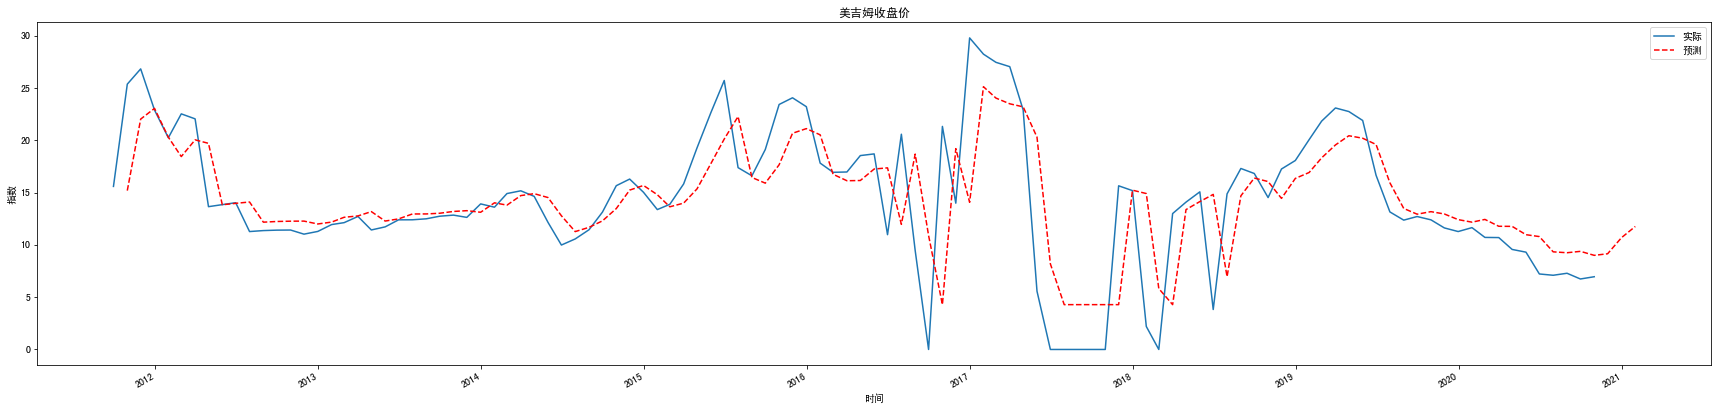

In [18]:
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=len(df_month2))
# 第一个元素不正确，设置为NaN
df_month2['forecast'][0] = np.NaN
print(df_month2)

# 沪市指数预测结果显示
plt.figure(figsize=(30,7))
df_month2.收盘价.plot(label='实际')
df_month2.forecast.plot(color='r', ls='--', label='预测')
plt.legend()
plt.title('美吉姆收盘价')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()